In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

# 한글 설정하기
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 마이너스 부호 꺠짐 방지 
plt.rc('axes', unicode_minus=False)

#데이터
file_name = 'tbsh_gyeonggi_day_202507_이천시.csv'
df = pd.read_csv(file_name, encoding='utf-8')

print("데이터 크기:", df.shape)
display(df.head())

데이터 크기: (536716, 12)


,ta_ymd,cty_rgn_no,admi_cty_no,card_tpbuz_cd,card_tpbuz_nm_1,card_tpbuz_nm_2,hour,sex,age,day,amt,cnt
0,20250701,41500,41500250,D01,소매/유통,가전제품,3,M,4,2,20048,2
1,20250701,41500,41500250,D01,소매/유통,가전제품,3,M,5,2,3349372,2
2,20250701,41500,41500250,D01,소매/유통,가전제품,3,M,6,2,176614,4
3,20250701,41500,41500250,D01,소매/유통,가전제품,4,M,6,2,4425860,2
4,20250701,41500,41500250,D01,소매/유통,가전제품,5,F,5,2,960401,2


In [3]:
#데이터 몸체 확인
df.info()

#데이터 표로 보여줘
display(df.describe())

#데이터 대분류 업종 보여줘(중복제외)
print(df['card_tpbuz_nm_1'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536716 entries, 0 to 536715
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ta_ymd           536716 non-null  int64 
 1   cty_rgn_no       536716 non-null  int64 
 2   admi_cty_no      536716 non-null  int64 
 3   card_tpbuz_cd    536716 non-null  object
 4   card_tpbuz_nm_1  536716 non-null  object
 5   card_tpbuz_nm_2  536716 non-null  object
 6   hour             536716 non-null  int64 
 7   sex              536716 non-null  object
 8   age              536716 non-null  int64 
 9   day              536716 non-null  int64 
 10  amt              536716 non-null  int64 
 11  cnt              536716 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 49.1+ MB


,ta_ymd,cty_rgn_no,admi_cty_no,hour,age,day,amt,cnt
count,5.367160e+05,536716.0,5.367160e+05,536716.000000,536716.000000,536716.000000,5.367160e+05,536716.000000
mean,2.025072e+07,41500.0,4.150040e+07,5.454039,5.323532,3.880242,4.350508e+05,11.871126
std,9.009929e+00,0.0,1.073647e+02,2.266018,1.634995,1.914992,1.746365e+06,29.681936
min,2.025070e+07,41500.0,4.150025e+07,1.000000,2.000000,1.000000,1.400000e+01,1.000000
25%,2.025071e+07,41500.0,4.150032e+07,4.000000,4.000000,2.000000,3.560700e+04,2.000000
50%,2.025072e+07,41500.0,4.150035e+07,5.000000,5.000000,4.000000,1.063860e+05,4.000000
75%,2.025072e+07,41500.0,4.150052e+07,7.000000,7.000000,5.000000,3.187272e+05,9.000000
max,2.025073e+07,41500.0,4.150053e+07,10.000000,11.000000,7.000000,1.525794e+08,976.000000


['소매/유통' '생활서비스' '여가/오락' '음식' '학문/교육' '의료/건강' '공공/기업/단체' '미디어/통신' '공연/전시']


card_tpbuz_nm_1
소매/유통       108095006491
생활서비스        50821906080
음식           38086959612
의료/건강        17043178465
학문/교육         9135061328
여가/오락         7102140003
미디어/통신        1969332246
공공/기업/단체      1234110654
공연/전시           11031478
Name: amt, dtype: int64


C:\Users\owner\AppData\Local\Temp\ipykernel_14356\70678774.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_amt.index,y=industry_amt.values, palette='viridis')


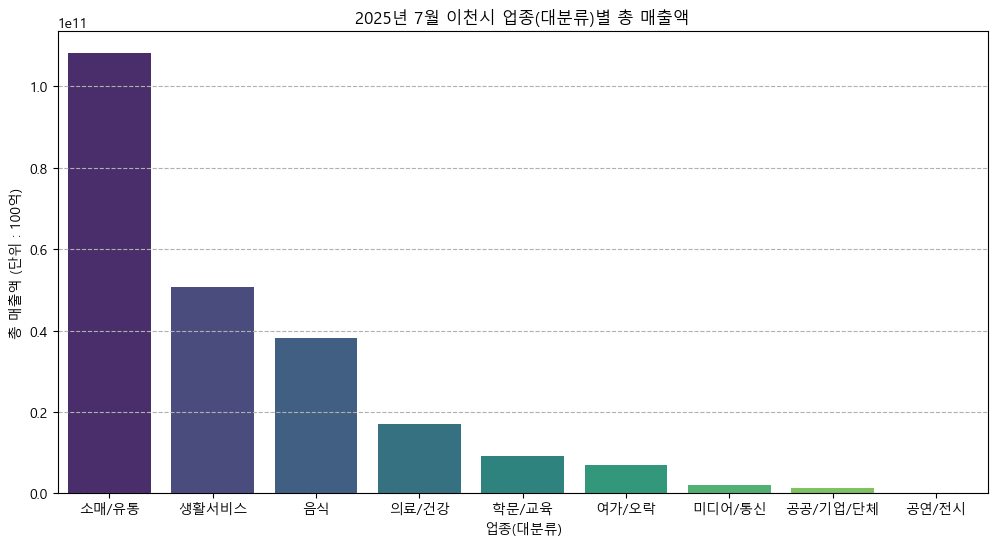

In [4]:
#업종(대분류) 별 매출총액
industry_amt = df.groupby('card_tpbuz_nm_1')['amt'].sum().sort_values(ascending=False)

print(industry_amt)

#그래프 설정
plt.figure(figsize=(12,6))
sns.barplot(x=industry_amt.index,y=industry_amt.values, palette='viridis')

plt.title('2025년 7월 이천시 업종(대분류)별 총 매출액')
plt.xlabel('업종(대분류)')
plt.ylabel('총 매출액 (단위 : 100억)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

C:\Users\owner\AppData\Local\Temp\ipykernel_14356\724124841.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=retail_detail.head(10).index, y=retail_detail.head(10).values, palette='magma')


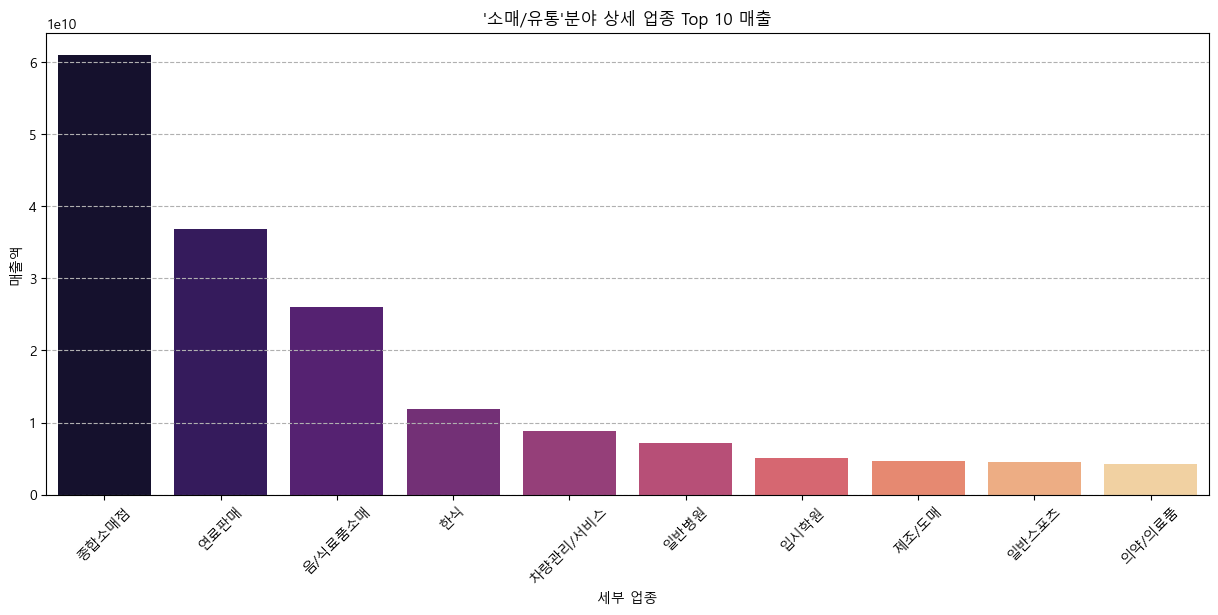

In [5]:
# '소매/유통' 데이터를 뽑아 세부 업종별 매출 확인

## '소매/유통' 데이터 추출
retail_df = df[df['card_tpbuz_nm_1'] == '소매/유통']

## '소매/유통' 세부 업종별 매출액 집계
retail_detail = df.groupby('card_tpbuz_nm_2')['amt'].sum().sort_values(ascending=False)

## 확인(10개만)
retail_detail.head(10)

## 시각화
plt.figure(figsize=(15,6))

sns.barplot(x=retail_detail.head(10).index, y=retail_detail.head(10).values, palette='magma')
plt.title("'소매/유통'분야 상세 업종 Top 10 매출")
plt.xlabel('세부 업종')
plt.ylabel('매출액')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

C:\Users\owner\AppData\Local\Temp\ipykernel_14356\679032789.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=time_sales.index, y=time_sales.values, marker='o', palette='coral', linewidth=2)


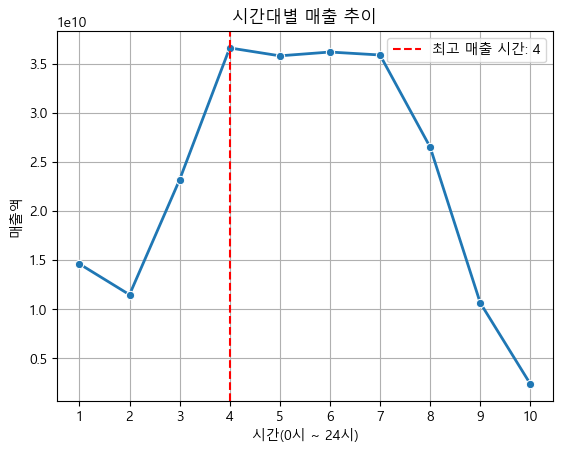

In [6]:
# 시간대 별 총 매출액 집계
time_sales = df.groupby('hour')['amt'].sum()

## 시각화
plt.Figure(figsize=(12,6))

sns.lineplot(x=time_sales.index, y=time_sales.values, marker='o', palette='coral', linewidth=2)

#가장 매출이 높은 시간 강조
max_hour = time_sales.idxmax() #1등업종 이름
max_amt = time_sales.max() #1등업종의 매출액
plt.axvline(x=max_hour, color='red', linestyle='--', label=f"최고 매출 시간: {max_hour}") #수직

plt.title('시간대별 매출 추이')
plt.xlabel('시간(0시 ~ 24시)')
plt.ylabel('매출액')
plt.xticks(range(1,11))
plt.grid()
plt.legend()

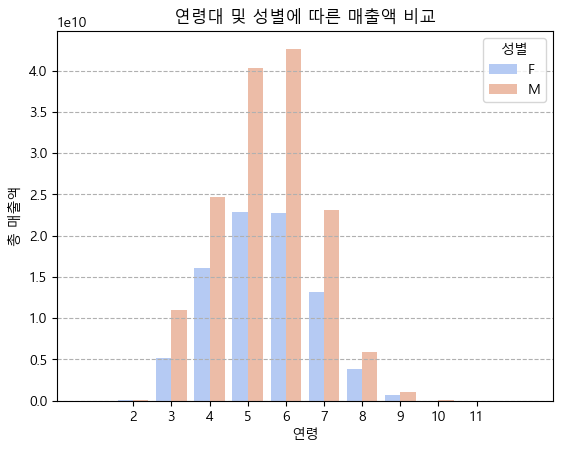

In [7]:
# 연령대 별 성별 매출액 집계
age_sex_sales = df.groupby(['age','sex'])['amt'].sum().reset_index()

#시각화
plt.Figure(figsize=(12,6))

sns.barplot(x='age', y= 'amt', hue='sex', data=age_sex_sales, palette="coolwarm")

plt.title('연령대 및 성별에 따른 매출액 비교')
plt.xlabel('연령')
plt.xlim(-2,11)
plt.ylabel('총 매출액')
plt.grid(axis='y', linestyle='--')
plt.legend(title='성별')

plt.show()

In [8]:
df['sex'] = df['sex'].astype('category')
df['hour'] = df['hour'].astype('category')
df['day'] = df['day'].astype('category')
df['card_tpbuz_cd'] = df['card_tpbuz_cd'].astype('category')
df['card_tpbuz_nm_2'] = df['card_tpbuz_nm_2'].astype('category')
df['card_tpbuz_nm_1'] = df['card_tpbuz_nm_1'].astype('category')
df['admi_cty_no'] = df['admi_cty_no'].astype('category')
df['cty_rgn_no'] = df['cty_rgn_no'].astype('category')
df['age'] = df['age'].astype('category')
df['ta_ymd'] = pd.to_datetime(df['ta_ymd'], format="%Y%m%d")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536716 entries, 0 to 536715
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ta_ymd           536716 non-null  datetime64[ns]
 1   cty_rgn_no       536716 non-null  category      
 2   admi_cty_no      536716 non-null  category      
 3   card_tpbuz_cd    536716 non-null  category      
 4   card_tpbuz_nm_1  536716 non-null  category      
 5   card_tpbuz_nm_2  536716 non-null  category      
 6   hour             536716 non-null  category      
 7   sex              536716 non-null  category      
 8   age              536716 non-null  category      
 9   day              536716 non-null  category      
 10  amt              536716 non-null  int64         
 11  cnt              536716 non-null  int64         
dtypes: category(9), datetime64[ns](1), int64(2)
memory usage: 16.9 MB


In [9]:
#매핑 자료
age = {
    1 : '0 ~ 9',
    2 : '10 ~ 19',
    3 : '20 ~ 29',
    4 : '30 ~ 39',
    5 : '40 ~ 49',
    6 : '50 ~ 59',
    7 : '60 ~ 69',
    8 : '70 ~ 79',
    9 : '80 ~ 89',
    10 : '90 ~ 99',
    11 : '100+'
}

time = {
    1 : '00:00 ~ 06:59',
    2 : '07:00 ~ 08:59',
    3 : '09:00 ~ 10:59',
    4 : '11:00 ~ 12:59',
    5 : '13:00 ~ 14:59',
    6 : '15:00 ~ 16:59',
    7 : '17:00 ~ 18:59',
    8 : '19:00 ~ 20:59',
    9 : '21:00 ~ 22:59',
    10 : '23:00~ 23:59'
}

day = {
    1 : 'Mon',
    2 : 'Tue',
    3 : 'Wed',
    4 : 'Thu',
    5 : 'Fri',
    6 : 'Sat',
    7 : 'Sun'
}

df['day'] = df['day'].map(day)
df['hour'] = df['hour'].map(time)
df['age'] = df['age'].map(age)

C:\Users\owner\AppData\Local\Temp\ipykernel_14356\2165100058.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_hour_pivot = df.pivot_table(index='age', columns='hour', values='amt', aggfunc=sum)
C:\Users\owner\AppData\Local\Temp\ipykernel_14356\2165100058.py:4: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  age_hour_pivot = df.pivot_table(index='age', columns='hour', values='amt', aggfunc=sum)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, '00:00 ~ 06:59'),
  Text(1.5, 0, '07:00 ~ 08:59'),
  Text(2.5, 0, '09:00 ~ 10:59'),
  Text(3.5, 0, '11:00 ~ 12:59'),
  Text(4.5, 0, '13:00 ~ 14:59'),
  Text(5.5, 0, '15:00 ~ 16:59'),
  Text(6.5, 0, '17:00 ~ 18:59'),
  Text(7.5, 0, '19:00 ~ 20:59'),
  Text(8.5, 0, '21:00 ~ 22:59'),
  Text(9.5, 0, '23:00~ 23:59')])

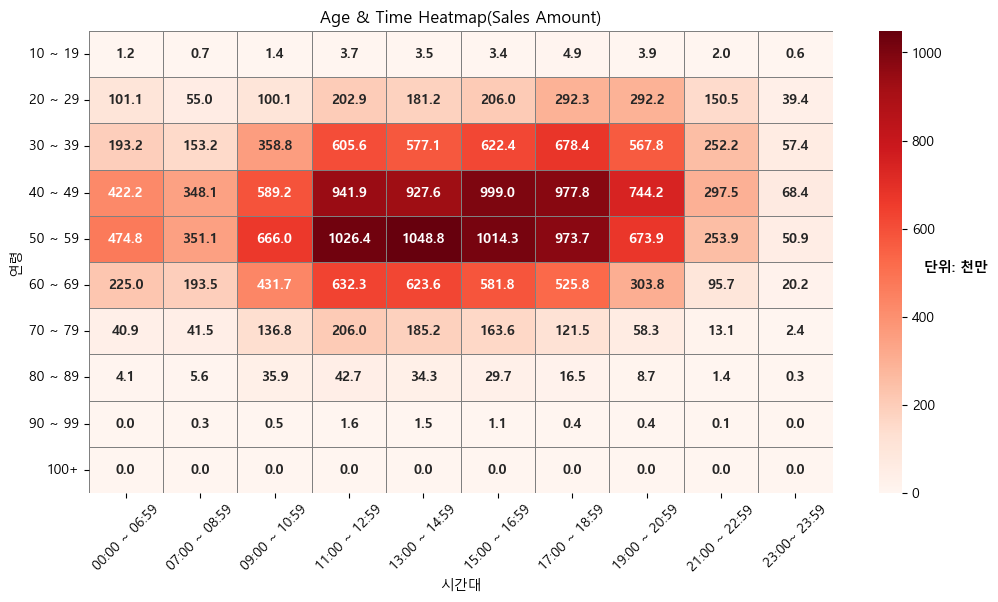

In [10]:
# 히트맵으로 연령대 별 시간 확인
## pivot_table을 해야 히트맵 작성 가능
### 값을 10,000,000(천만) 단위로 조정 (시각화)
age_hour_pivot = df.pivot_table(index='age', columns='hour', values='amt', aggfunc=sum)
age_hour_pivot = age_hour_pivot/10000000

#시각화
plt.figure(figsize=(12,6))

#ax에 히트맵 저장
ax = sns.heatmap(data=age_hour_pivot, cmap='Reds', annot=True, fmt='.1f', annot_kws={'weight': 'bold', 'size':10}, linewidths=0.5, linecolor='gray')

#히트맨 라벨 글씨조정
cbar = ax.collections[0].colorbar
cbar.set_label('단위: 천만', rotation=0, labelpad=10, fontsize=10, weight='bold')

plt.title('Age & Time Heatmap(Sales Amount)')
plt.xlabel('시간대')
plt.ylabel('연령')
plt.xticks(rotation=45)

C:\Users\owner\AppData\Local\Temp\ipykernel_14356\3718263086.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  day_hour_pivot= df.pivot_table(index='day', columns='hour', values='cnt', aggfunc=sum)/10000
C:\Users\owner\AppData\Local\Temp\ipykernel_14356\3718263086.py:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  day_hour_pivot= df.pivot_table(index='day', columns='hour', values='cnt', aggfunc=sum)/10000


Text(121.72222222222221, 0.5, '요일')

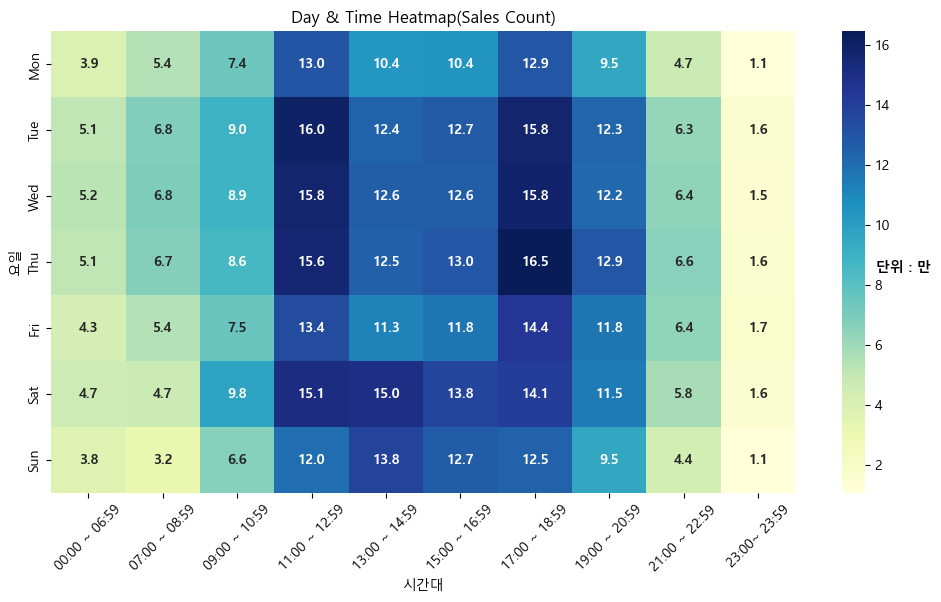

In [11]:
# 요일과 시간대 별 히트맵
## 동일하게  Pivot 제작
day_hour_pivot= df.pivot_table(index='day', columns='hour', values='cnt', aggfunc=sum)/10000

plt.figure(figsize=(12,6))

ax = sns.heatmap(data=day_hour_pivot, cmap='YlGnBu', annot=True, fmt='.1f',annot_kws={'weight':'bold', 'fontsize':10}, cbar_kws={'label': '(단위: 만)'})

cbar = ax.collections[0].colorbar
cbar.set_label('단위 : 만',rotation =0, weight='bold', labelpad=10, fontsize = 10)

plt.xticks(rotation=45)
plt.title('Day & Time Heatmap(Sales Count)')
plt.xlabel('시간대')
plt.ylabel('요일')
